In [1]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
calc_date = ql.Date(16, 8, 2016)
ql.Settings.instance().evaluationDate = calc_date

In [2]:
day_count = ql.ActualActual(ql.ActualActual.Bond)
rate = 0.035
ts = ql.FlatForward(calc_date, rate, day_count, ql.Compounded, ql.Semiannual)
ts_handle = ql.YieldTermStructureHandle(ts)

In [4]:
callability_schedule = ql.CallabilitySchedule()
call_price = 100.0
call_date = ql.Date(15, ql.September, 2016)
null_calendar = ql.NullCalendar()
for i in range(0, 24):
    callability_price = ql.CallabilityPrice(call_price, ql.CallabilityPrice.Clean)
    callability_schedule.append(ql.Callability(callability_price, ql.Callability.Call, call_date))
    calll_date = null_calendar.advance(call_date, 3, ql.Months)

In [5]:
issue_date = ql.Date(16, ql.September, 2014)
maturity_date = ql.Date(15, ql.September, 2022)
calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
tenor = ql.Period(ql.Quarterly)
accrual_convention = ql.Unadjusted

schedule = ql.Schedule(issue_date, maturity_date, tenor, calendar, accrual_convention, accrual_convention, ql.DateGeneration.Backward, False)

In [6]:
settlement_days = 3
face_amount = 100
accrual_daycount = ql.ActualActual(ql.ActualActual.Bond)
coupon = 0.025

bond = ql.CallableFixedRateBond(settlement_days, face_amount, schedule, [coupon], accrual_daycount, ql.Following, face_amount, issue_date, callability_schedule)

In [7]:
def value_bond(a, s, grid_points, bond):
    model = ql.HullWhite(ts_handle, a, s)
    engine = ql.TreeCallableFixedRateBondEngine(model, grid_points)
    bond.setPricingEngine(engine)
    return bond

In [8]:
bond = value_bond(0.03, 0.12, 40, bond)
print("Bond price: %lf" % bond.cleanPrice())

Bond price: 90.134201


In [9]:
sigmas = np.arange(0.001, 0.15, 0.001)
prices = [value_bond(0.03, s, 40, bond).cleanPrice() for s in sigmas]

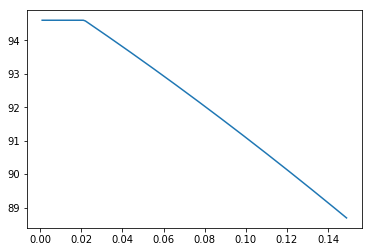

In [10]:
_, ax = plt.subplots()
ax.plot(sigmas, prices)

In [12]:
import pandas as pd
pd.DataFrame([(cf.date(), cf.amount()) for cf in bond.cashflows()], columns=["Date", "Amount"], index=range(1, len(bond.cashflows())+1))

,Date,Amount
1,"December 15th, 2014",0.618132
2,"March 16th, 2015",0.625000
3,"June 15th, 2015",0.625000
4,"September 15th, 2015",0.625000
5,"December 15th, 2015",0.625000
6,"March 15th, 2016",0.625000
7,"June 15th, 2016",0.625000
8,"September 15th, 2016",0.625000
9,"December 15th, 2016",0.625000
10,"March 15th, 2017",0.625000
